In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB

**Import SMS Data**

In [19]:
df = pd.read_csv('train.csv')
df.head()

,Type,Message
0,Friendly,"Es ilbcx jinslo zsclb, mnyrk.. Opycxyfxa slxk ..."
1,Friendly,Iq xyn... Zsqclo wch i slc...
2,Friendly,Y til uyk us aynxk vsn... Y m yxnaytk bval uyk...
3,Friendly,"Byv S tsl'b bvclq va osau bs iuh, va xcpau yns..."
4,Hostile,XnaaUuo Lak bvana tynxclo cb'u faal 3 waaq'u l...


In [20]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Type,Message
0,?,Xnaa albnk cl 2 y wqxk msez bs wcl XO Ciz hcly...
1,?,Ou zan ksin nagiaub 'Uaxxa Uaxxa (Ini Ucllyecl...
2,?,MSBBQD!! Ou y pyxiat labwsnq miubsean ksi vypa...
3,?,Xcla ch bvybåÕu bva wyk i haax. RvybåÕu bva wy...
4,?,Ziub hsnmat ekuaxh bs ayb y uxcma. S'e nayxxk ...


In [3]:
#Find count and unique messages count of all the messages
df.describe()

,Type,Message
count,4142,4142
unique,2,3906
top,Friendly,"Ksnnk, S'xx myxx xyban"
freq,3585,26


In [6]:
#Extract SPAM messages
spam_messages = df[df["Type"]=="Hostile"]
spam_messages.head() #Display first 5 rows of SPAM messages

,Type,Message
4,Hostile,XnaaUuo Lak bvana tynxclo cb'u faal 3 waaq'u l...
6,Hostile,Lyt ksin esfcxa 11 eslbvu sn esna? Y D albcbxa...
8,Hostile,"KST mvylmau bs wcl COKL! Xnse 100 bs 20,000 zs..."
9,Hostile,YDEQBR! Asi vypa wsl y 1 waaq XDQQ eaefanuvcz ...
12,Hostile,"TTTUsfcxaUspcaCxif: Rs iua ksin mnatcb, mxcmq ..."


In [7]:
#Find count and unique messages count of SPAM messages.
spam_messages.describe()

,Type,Message
count,557,557
unique,1,501
top,Hostile,Pxayua myxx sin miubsean uanpcma naznaualbybcp...
freq,557,3


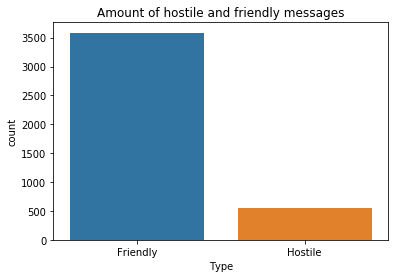

In [8]:
#Plot the counts of HAM (non SPAM) vs SPAM
sns.countplot(data = df, x= df["Type"]).set_title("Amount of hostile and friendly messages")
plt.show()

**Splitting the SMS data into Test and Train data**

In [10]:
data_train, data_test, labels_train, labels_test = train_test_split(df.Message,df.Type,test_size=0.2,random_state=0) 
print("data_train, labels_train : ",data_train.shape, labels_train.shape)
print("data_test, labels_test: ",data_test.shape, labels_test.shape)

data_train, labels_train :  (3313,) (3313,)
data_test, labels_test:  (829,) (829,)


In [22]:
data_test2=df_test.Message
data_test2.head()

0    Xnaa albnk cl 2 y wqxk msez bs wcl XO Ciz hcly...
1    Ou zan ksin nagiaub 'Uaxxa Uaxxa (Ini Ucllyecl...
2    MSBBQD!! Ou y pyxiat labwsnq miubsean ksi vypa...
3    Xcla ch bvybåÕu bva wyk i haax. RvybåÕu bva wy...
4    Ziub hsnmat ekuaxh bs ayb y uxcma. S'e nayxxk ...
Name: Message, dtype: object

**Extraction & CountVectorize**


*The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.*

In [23]:
vectorizer = CountVectorizer()
#fit & transform
# fit: build dict (i.e. word->wordID)  
# transform: convert document (i.e. each line in the file) to word vector 
data_train_count = vectorizer.fit_transform(data_train)
data_test_count  = vectorizer.transform(data_test)
data_test_count2 = vectorizer.transform(data_test2)

**Modelling & training**

Multinomial Naive Bayes is a specialized version of Naive Bayes that is designed more for text documents. Whereas simple naive Bayes would model a document as the presence and absence of particular words, multinomial naive bayes explicitly models the word counts and adjusts the underlying calculations to deal with in.

It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [60]:
for i in range(1,20):
     clf = MultinomialNB(alpha=i/200)
     clf.fit(data_train_count, labels_train)
     predictions = clf.predict(data_test_count)
     print ("accuracy_score : ", accuracy_score(labels_test, predictions))

accuracy_score :  0.9867310012062727
accuracy_score :  0.9867310012062727
accuracy_score :  0.9879372738238842
accuracy_score :  0.9891435464414958
accuracy_score :  0.9891435464414958
accuracy_score :  0.9891435464414958
accuracy_score :  0.9891435464414958
accuracy_score :  0.9891435464414958
accuracy_score :  0.9891435464414958
accuracy_score :  0.9879372738238842
accuracy_score :  0.9879372738238842
accuracy_score :  0.9879372738238842
accuracy_score :  0.9879372738238842
accuracy_score :  0.9891435464414958
accuracy_score :  0.9891435464414958
accuracy_score :  0.9891435464414958
accuracy_score :  0.9891435464414958
accuracy_score :  0.9891435464414958
accuracy_score :  0.9891435464414958


**Results and Accuracy**

In [56]:
MultinomialNB?

**Confusion Matrix**


*A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.*

In [61]:
print ("confusion_matrix : \n", confusion_matrix(labels_test, predictions))

confusion_matrix : 
 [[708   1]
 [  8 112]]


In [62]:
print (classification_report(labels_test, predictions))

              precision    recall  f1-score   support

    Friendly       0.99      1.00      0.99       709
     Hostile       0.99      0.93      0.96       120

    accuracy                           0.99       829
   macro avg       0.99      0.97      0.98       829
weighted avg       0.99      0.99      0.99       829



In [51]:
predictions_test = clf.predict(data_test_count2)

In [53]:
df_predictions_test=pd.DataFrame(predictions_test)
df_predictions_test.to_csv('predictions_test1.csv')

In [ ]:
clf = MultinomialNB()
clf.fit(data_train_count, labels_train)
predictions = clf.predict(data_test_count)

In [31]:
import numpy as np

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

In [32]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(data_train_count, labels_train)

y_pred = xgb_model.predict(data_test_count)

print(confusion_matrix(labels_test, y_pred))

print ("accuracy_score : ", accuracy_score(labels_test, y_pred))

[[709   0]
 [ 27  93]]
accuracy_score :  0.9674306393244874


In [33]:
predictions_test_xgb = xgb_model.predict(data_test_count2)
df_predictions_test_xgb=pd.DataFrame(predictions_test_xgb)
df_predictions_test_xgb.to_csv('predictions_test_xgb.csv')